# Applying DBSCAN to the JPLUS data

Using the color criteria based on clor diagram. The color cirterio is based on the eq. (r - J0660) >= 0.25*(r - i) - 0.28.

In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
from astropy.table import Table

In [2]:
# Read the data
mag = []
tab = Table.read("../JPLUS_data_6arc.tab", format="ascii.tab")
#tab = Table.read("TAP_DR1SPLUS_HA_r_03.tab", format="ascii.tab")
for da in tab:
    mag.append(da["uJAVA_MAG_APER_6_0"])
    mag.append(da["J0378_MAG_APER_6_0"])
    mag.append(da["J0395_MAG_APER_6_0"])
    mag.append(da["J0410_MAG_APER_6_0"])
    mag.append(da["J0430_MAG_APER_6_0"])
    mag.append(da["gSDSS_MAG_APER_6_0"])
    mag.append(da["J0515_MAG_APER_6_0"])
    mag.append(da["rSDSS_MAG_APER_6_0"])
    mag.append(da["J0660_MAG_APER_6_0"])
    mag.append(da["iSDSS_MAG_APER_6_0"])
    mag.append(da["J0861_MAG_APER_6_0"])
    mag.append(da["zSDSS_MAG_APER_6_0"])

In [3]:
shape = (len(tab["Number"]), 12)
mag_matrix = np.array(mag).reshape(shape)
mag_matrix.shape

(259461, 12)

In [4]:
mag_matrix

array([[16.8  , 16.742, 16.276, ..., 13.475, 13.388, 13.368],
       [17.37 , 17.351, 16.836, ..., 14.027, 13.928, 13.902],
       [17.729, 17.648, 17.379, ..., 14.628, 14.529, 14.514],
       ...,
       [19.008, 18.725, 18.75 , ..., 17.125, 17.111, 17.103],
       [17.947, 17.204, 16.722, ..., 16.958, 17.039, 17.095],
       [18.638, 18.714, 18.368, ..., 16.465, 16.408, 16.4  ]])

In [5]:
# Standarized the data
mag_matrix = StandardScaler().fit_transform(mag_matrix)
mag_matrix

array([[-1.09777987, -0.96233449, -1.2278561 , ..., -1.88766502,
        -1.90902906, -1.90857681],
       [-0.63770197, -0.480241  , -0.78166047, ..., -1.46345737,
        -1.49656349, -1.50216201],
       [-0.34793361, -0.24513136, -0.34901005, ..., -1.00159361,
        -1.0375046 , -1.03638325],
       ...,
       [ 0.68441663,  0.60743792,  0.74337248, ...,  0.9173312 ,
         0.93469186,  0.93404355],
       [-0.17197399, -0.59660839, -0.87249315, ...,  0.78899301,
         0.87969645,  0.92795494],
       [ 0.38576957,  0.59873016,  0.43900332, ...,  0.4101264 ,
         0.3977228 ,  0.39900684]])

In [6]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=24).fit(mag_matrix)
labels = db.labels_

In [7]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_cluster = list(labels).count(0)
n_noise_ = list(labels).count(-1)

In [8]:
# Print parameters
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of cluster points: %d' % n_cluster)
print('Estimated number of noise points: %d' % n_noise_)

# Add labels
tab['DBSCAN_opt_labels'] = labels

Estimated number of clusters: 1
Estimated number of cluster points: 255443
Estimated number of noise points: 4018


In [9]:
# Colors
r_i = tab["rSDSS_MAG_APER_6_0"] - tab["iSDSS_MAG_APER_6_0"]
r_ha = tab["rSDSS_MAG_APER_6_0"] - tab["J0660_MAG_APER_6_0"]

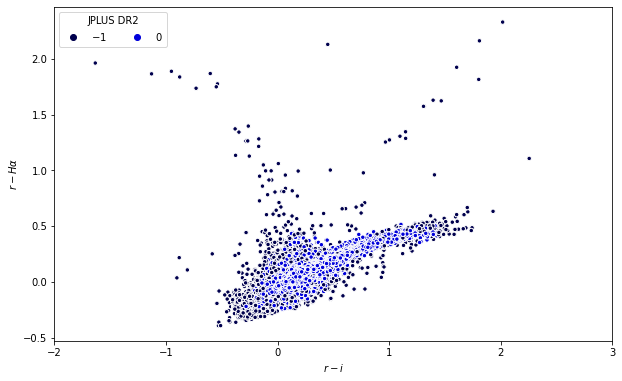

In [10]:
# Plotting
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 10))
levels = np.array([0.001, 0.003, 0.01, 0.03, 0.1, 1.0])
GAMMA = 0.05
scatter = ax.scatter(
    r_i,
    r_ha,
    s=20,
    c=tab['DBSCAN_opt_labels'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax.set_aspect("equal")

Now compured the distance using NearestNeighbors

In [110]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=24)
nbrs = neigh.fit(mag_matrix)
distances, indices = nbrs.kneighbors(mag_matrix)

In [111]:
distances

array([[0.        , 0.09708058, 0.10138668, ..., 0.156482  , 0.15820217,
        0.15964698],
       [0.        , 0.1001369 , 0.10385111, ..., 0.14745545, 0.14803661,
        0.14991489],
       [0.        , 0.06191751, 0.0636017 , ..., 0.11294501, 0.11456704,
        0.11812569],
       ...,
       [0.        , 0.06254086, 0.06585253, ..., 0.09242273, 0.09269026,
        0.09296656],
       [0.        , 0.11640407, 0.13787703, ..., 0.39629215, 0.41458026,
        0.42529242],
       [0.        , 0.07074958, 0.08748471, ..., 0.128212  , 0.12855137,
        0.12964089]])

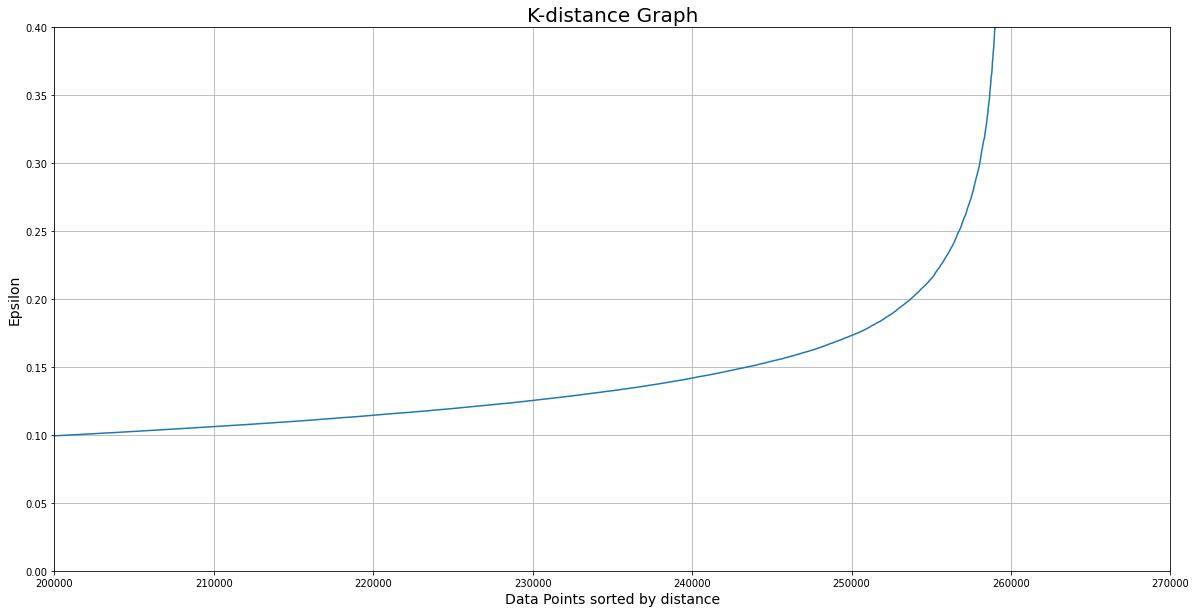

In [112]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.xlim(2e5,2.7e5)
plt.ylim(-0.0,0.4)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.grid()
plt.show()

In [14]:
# Compute DBSCAN for the eps=0.4, 2° model
db1 = DBSCAN(eps=0.4, min_samples=24).fit(mag_matrix)
labels1 = db1.labels_

In [15]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_1 = len(set(labels1)) - (1 if -1 in labels1 else 0)
n_cluster1 = list(labels1).count(0)
n_noise_1 = list(labels1).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_1)
print('Estimated number of cluster points: %d' % n_cluster1)
print('Estimated number of noise points: %d' % n_noise_1)

# Add labels
tab['DBSCAN_opt_labels1'] = labels1

Estimated number of clusters: 1
Estimated number of cluster points: 258001
Estimated number of noise points: 1460


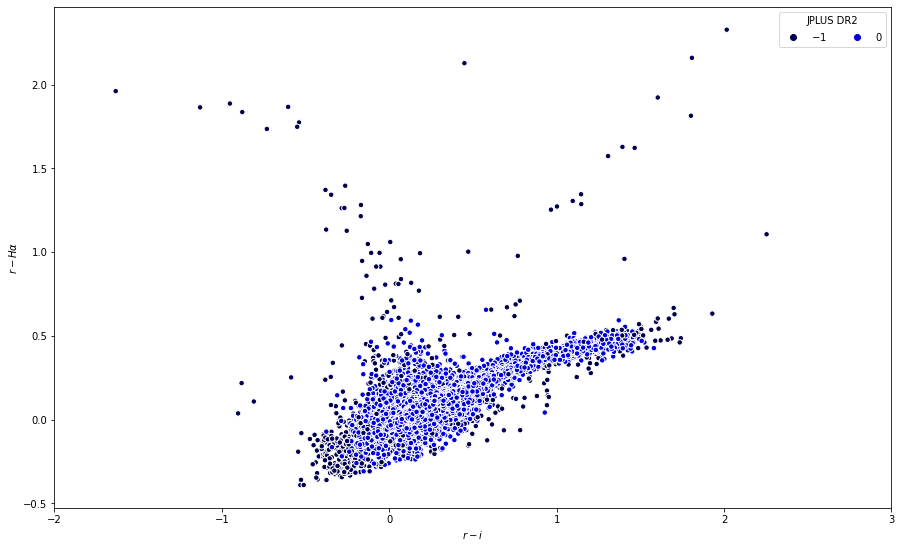

In [16]:
fig, ax1 = plt.subplots(figsize=(15, 15))
scatter = ax1.scatter(
    r_i,
    r_ha,
    s=30,
    c=tab['DBSCAN_opt_labels1'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax1.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax1.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax1.set_aspect("equal")

In [17]:
# Compute DBSCAN for the eps=0.2, 3° model
db2 = DBSCAN(eps=0.2, min_samples=24).fit(mag_matrix)
labels2 = db2.labels_

In [51]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_2 = len(set(labels2)) - (1 if -1 in labels2 else 0)
n_cluster2 = list(labels2).count(7)
n_noise_2 = list(labels2).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_2)
print('Estimated number of cluster points: %d' % n_cluster2)
print('Estimated number of noise points: %d' % n_noise_2)

# Add labels
tab['DBSCAN_opt_labels2'] = labels2

Estimated number of clusters: 8
Estimated number of cluster points: 18
Estimated number of noise points: 14751


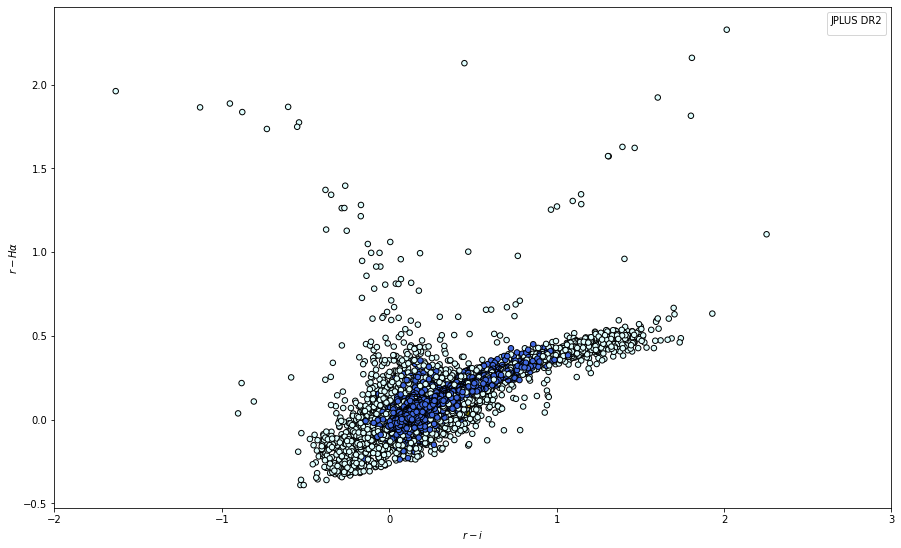

In [53]:
import matplotlib
fig, ax2 = plt.subplots(figsize=(15, 15))
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 
          'deeppink', 'olive', 'goldenrod', 'lightcyan']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])
ax2.scatter(r_i, r_ha,s=30,
    c=vectorizer(tab['DBSCAN_opt_labels2']),
    edgecolors="k",
    linewidths=1)
ax2.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$")
ax2.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax2.set_aspect("equal")

In [20]:
# Compute DBSCAN for the eps=0.25, 4° model
db3 = DBSCAN(eps=0.25, min_samples=24).fit(mag_matrix)
labels3 = db3.labels_

In [21]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_3 = len(set(labels3)) - (1 if -1 in labels3 else 0)
n_cluster3 = list(labels3).count(0)
n_noise_3 = list(labels3).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_3)
print('Estimated number of cluster points: %d' % n_cluster3)
print('Estimated number of noise points: %d' % n_noise_3)

# Add labels
tab['DBSCAN_opt_labels3'] = labels3

Estimated number of clusters: 1
Estimated number of cluster points: 252726
Estimated number of noise points: 6735


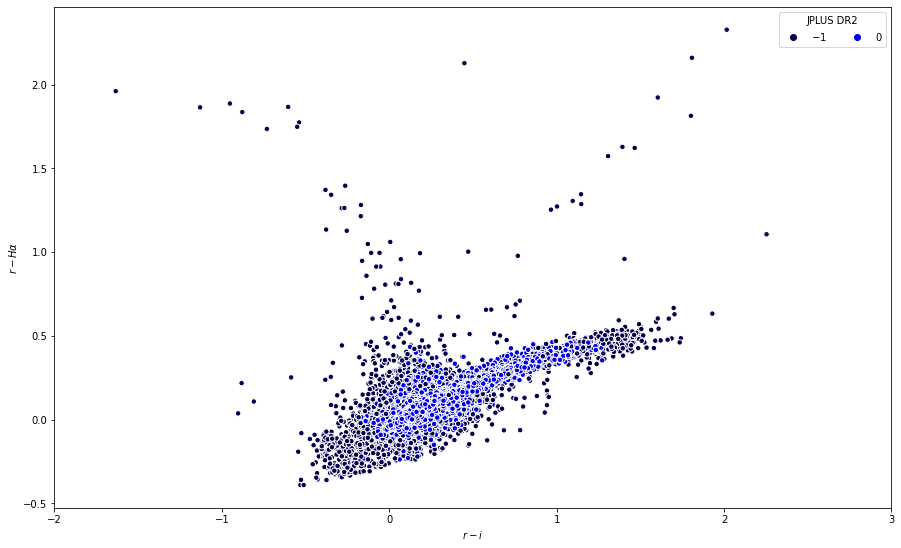

In [22]:
fig, ax3 = plt.subplots(figsize=(15, 15))
scatter = ax3.scatter(
    r_i,
    r_ha,
    s=30,
    c=tab['DBSCAN_opt_labels3'],
    edgecolors="w",
    linewidths=1,
    vmin=-1,
    vmax=4,
    cmap="seismic",
)
ax3.set(
    xlim=[-2.0, 3.0],
    #ylim=[ymin, ymax],
    xlabel=r"$r - i$",
    ylabel=r"$r - H\alpha$",
)
ax3.legend(*scatter.legend_elements(), ncol=2, title="JPLUS DR2")
ax3.set_aspect("equal")

In [23]:
# Mask model 4 eps = 0.25
mask = tab['DBSCAN_opt_labels3'] == -1

In [24]:
# Applying mask
tab_noise = tab[mask]
len(tab_noise)

6735

In [25]:
tab_noise

Tile,Number,RA,Dec,petro_radius,kron_radius,rSDSS_MAG_APER_6_0,gSDSS_MAG_APER_6_0,iSDSS_MAG_APER_6_0,zSDSS_MAG_APER_6_0,uJAVA_MAG_APER_6_0,J0378_MAG_APER_6_0,J0395_MAG_APER_6_0,J0410_MAG_APER_6_0,J0430_MAG_APER_6_0,J0515_MAG_APER_6_0,J0660_MAG_APER_6_0,J0861_MAG_APER_6_0,rSDSS_MAG_APER_6_0_err,gSDSS_MAG_APER_6_0_err,iSDSS_MAG_APER_6_0_err,zSDSS_MAG_APER_6_0_err,uJAVA_MAG_APER_6_0_err,J0378_MAG_APER_6_0_err,J0395_MAG_APER_6_0_err,J0410_MAG_APER_6_0_err,J0430_MAG_APER_6_0_err,J0515_MAG_APER_6_0_err,J0660_MAG_APER_6_0_err,J0861_MAG_APER_6_0_err,rSDSS_FLAGS,gSDSS_FLAGS,iSDSS_FLAGS,zSDSS_FLAGS,uJAVA_FLAGS,J0378_FLAGS,J0395_FLAGS,J0410_FLAGS,J0430_FLAGS,J0515_FLAGS,J0660_FLAGS,J0861_FLAGS,rSDSS_MASK_FLAGS,gSDSS_MASK_FLAGS,iSDSS_MASK_FLAGS,zSDSS_MASK_FLAGS,uJAVA_MASK_FLAGS,J0378_MASK_FLAGS,J0395_MASK_FLAGS,J0410_MASK_FLAGS,J0430_MASK_FLAGS,J0515_MASK_FLAGS,J0660_MASK_FLAGS,J0861_MASK_FLAGS,DBSCAN_opt_labels,DBSCAN_opt_labels1,DBSCAN_opt_labels2,DBSCAN_opt_labels3
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
69300,3197,180.727314421,56.4618437895,3.5,3.5,16.231,16.155,16.434,16.441,17.518,16.749,16.293,16.123,16.126,16.111,16.334,16.437,0.007,0.006,0.017,0.019,0.025,0.015,0.012,0.011,0.01,0.011,0.012,0.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
62913,7160,145.994130173,30.1042986666,4.61999989,3.5,19.145,19.464,18.991,18.737,19.834,19.982,19.771,19.72,19.67,19.315,19.359,19.162,0.032,0.032,0.069,0.149,0.147,0.171,0.143,0.145,0.135,0.105,0.127,0.176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
69300,3839,182.299315073,56.5136926038,5.93999958,3.52306867,17.051,17.988,16.664,16.369,19.987,19.503,19.017,19.258,18.463,17.634,16.933,16.428,0.012,0.022,0.02,0.018,0.186,0.127,0.085,0.111,0.056,0.03,0.019,0.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,3931,181.295410705,56.532797955,7.91999912,4.82889271,18.842,18.922,18.428,18.586,19.599,19.586,19.482,19.019,19.067,18.858,18.706,18.818,0.047,0.046,0.083,0.119,0.132,0.138,0.126,0.089,0.091,0.079,0.074,0.133,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,4025,180.518594688,56.5352566594,6.59999943,3.77421451,17.382,18.265,16.94,16.648,19.949,19.804,19.634,19.38,18.717,17.903,17.239,16.683,0.015,0.027,0.025,0.023,0.18,0.167,0.147,0.123,0.068,0.037,0.023,0.022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,4173,182.409578561,56.5466428753,5.27999973,3.5,17.722,18.492,17.402,17.099,20.039,19.901,19.46,19.271,18.91,18.158,17.678,17.183,0.02,0.033,0.036,0.033,0.193,0.181,0.124,0.111,0.081,0.045,0.033,0.033,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,4235,180.554611719,56.55626368,5.93999958,3.5,18.881,19.291,18.641,18.497,19.957,19.781,19.583,19.619,19.419,19.131,18.753,18.636,0.049,0.062,0.1,0.11,0.183,0.162,0.139,0.151,0.123,0.101,0.077,0.113,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,4273,181.416683233,56.5617252807,5.93999958,3.5,17.949,18.778,17.601,17.331,19.76,20.0,19.703,19.436,19.089,18.417,17.835,17.368,0.023,0.04,0.041,0.039,0.15,0.197,0.152,0.128,0.092,0.055,0.036,0.037,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,4345,181.276561539,56.5586700589,5.27999973,4.33751917,18.009,18.257,17.995,18.062,19.048,18.51,18.608,18.499,18.487,17.778,18.085,17.915,0.024,0.027,0.057,0.074,0.082,0.055,0.06,0.058,0.056,0.033,0.045,0.059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1


In [26]:
# Mask model 1 eps=0.3
mask03 = tab['DBSCAN_opt_labels'] == -1

In [27]:
# Applying mask
tab_noise_03 = tab[mask03]
len(tab_noise_03)

4018

In [28]:
tab_noise_03

Tile,Number,RA,Dec,petro_radius,kron_radius,rSDSS_MAG_APER_6_0,gSDSS_MAG_APER_6_0,iSDSS_MAG_APER_6_0,zSDSS_MAG_APER_6_0,uJAVA_MAG_APER_6_0,J0378_MAG_APER_6_0,J0395_MAG_APER_6_0,J0410_MAG_APER_6_0,J0430_MAG_APER_6_0,J0515_MAG_APER_6_0,J0660_MAG_APER_6_0,J0861_MAG_APER_6_0,rSDSS_MAG_APER_6_0_err,gSDSS_MAG_APER_6_0_err,iSDSS_MAG_APER_6_0_err,zSDSS_MAG_APER_6_0_err,uJAVA_MAG_APER_6_0_err,J0378_MAG_APER_6_0_err,J0395_MAG_APER_6_0_err,J0410_MAG_APER_6_0_err,J0430_MAG_APER_6_0_err,J0515_MAG_APER_6_0_err,J0660_MAG_APER_6_0_err,J0861_MAG_APER_6_0_err,rSDSS_FLAGS,gSDSS_FLAGS,iSDSS_FLAGS,zSDSS_FLAGS,uJAVA_FLAGS,J0378_FLAGS,J0395_FLAGS,J0410_FLAGS,J0430_FLAGS,J0515_FLAGS,J0660_FLAGS,J0861_FLAGS,rSDSS_MASK_FLAGS,gSDSS_MASK_FLAGS,iSDSS_MASK_FLAGS,zSDSS_MASK_FLAGS,uJAVA_MASK_FLAGS,J0378_MASK_FLAGS,J0395_MASK_FLAGS,J0410_MASK_FLAGS,J0430_MASK_FLAGS,J0515_MASK_FLAGS,J0660_MASK_FLAGS,J0861_MASK_FLAGS,DBSCAN_opt_labels,DBSCAN_opt_labels1,DBSCAN_opt_labels2,DBSCAN_opt_labels3
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
62913,7160,145.994130173,30.1042986666,4.61999989,3.5,19.145,19.464,18.991,18.737,19.834,19.982,19.771,19.72,19.67,19.315,19.359,19.162,0.032,0.032,0.069,0.149,0.147,0.171,0.143,0.145,0.135,0.105,0.127,0.176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
69300,4345,181.276561539,56.5586700589,5.27999973,4.33751917,18.009,18.257,17.995,18.062,19.048,18.51,18.608,18.499,18.487,17.778,18.085,17.915,0.024,0.027,0.057,0.074,0.082,0.055,0.06,0.058,0.056,0.033,0.045,0.059,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
69300,4432,182.138674588,56.5616214185,5.93999958,3.93934822,17.4,18.227,16.968,16.683,19.888,19.882,19.807,19.285,18.721,17.906,17.293,16.775,0.015,0.026,0.025,0.023,0.17,0.179,0.169,0.113,0.068,0.037,0.025,0.023,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
62913,7908,145.379802013,30.1476227142,5.93999958,3.5,19.349,19.422,19.024,18.854,19.155,19.65,19.384,19.679,19.114,19.501,19.19,19.005,0.038,0.031,0.071,0.168,0.083,0.129,0.103,0.139,0.083,0.125,0.11,0.155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
69300,4650,181.203143891,56.5986465777,4.61999989,3.5,18.772,18.995,18.918,18.876,18.867,18.75,19.11,19.025,18.876,19.103,18.424,19.241,0.044,0.048,0.127,0.153,0.07,0.067,0.092,0.09,0.077,0.098,0.058,0.193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
62913,8123,145.48147022,30.1578215714,4.61999989,3.5,18.536,18.693,18.601,18.542,18.801,18.747,18.697,18.534,18.705,18.648,18.552,18.509,0.019,0.017,0.049,0.126,0.061,0.06,0.058,0.053,0.059,0.06,0.064,0.099,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
69300,4866,181.636823394,56.6139747471,3.5,3.5,15.766,17.216,14.264,13.605,20.057,19.803,19.227,18.805,18.619,16.938,15.21,13.74,0.005,0.012,0.004,0.003,0.198,0.166,0.101,0.075,0.062,0.018,0.006,0.003,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
62913,8497,145.790350182,30.16993122,5.27999973,3.5,17.381,17.809,17.212,17.008,18.929,18.315,18.434,18.139,18.099,17.281,17.335,17.032,0.008,0.009,0.016,0.033,0.069,0.043,0.047,0.039,0.037,0.022,0.025,0.027,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1
69300,5279,180.941515044,57.0521137109,3.5,3.5,13.208,14.53,12.551,12.24,17.325,16.998,16.648,15.796,15.472,14.406,12.925,12.3,0.001,0.003,0.002,0.002,0.025,0.02,0.016,0.01,0.008,0.005,0.002,0.002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,-1,-1


In [29]:
# Mask model 2 eps=0.4
mask04 = tab['DBSCAN_opt_labels1'] == -1
# Applying mask
tab_noise_04 = tab[mask04]
len(tab_noise_04)

1460

In [30]:
tab_noise_04

Tile,Number,RA,Dec,petro_radius,kron_radius,rSDSS_MAG_APER_6_0,gSDSS_MAG_APER_6_0,iSDSS_MAG_APER_6_0,zSDSS_MAG_APER_6_0,uJAVA_MAG_APER_6_0,J0378_MAG_APER_6_0,J0395_MAG_APER_6_0,J0410_MAG_APER_6_0,J0430_MAG_APER_6_0,J0515_MAG_APER_6_0,J0660_MAG_APER_6_0,J0861_MAG_APER_6_0,rSDSS_MAG_APER_6_0_err,gSDSS_MAG_APER_6_0_err,iSDSS_MAG_APER_6_0_err,zSDSS_MAG_APER_6_0_err,uJAVA_MAG_APER_6_0_err,J0378_MAG_APER_6_0_err,J0395_MAG_APER_6_0_err,J0410_MAG_APER_6_0_err,J0430_MAG_APER_6_0_err,J0515_MAG_APER_6_0_err,J0660_MAG_APER_6_0_err,J0861_MAG_APER_6_0_err,rSDSS_FLAGS,gSDSS_FLAGS,iSDSS_FLAGS,zSDSS_FLAGS,uJAVA_FLAGS,J0378_FLAGS,J0395_FLAGS,J0410_FLAGS,J0430_FLAGS,J0515_FLAGS,J0660_FLAGS,J0861_FLAGS,rSDSS_MASK_FLAGS,gSDSS_MASK_FLAGS,iSDSS_MASK_FLAGS,zSDSS_MASK_FLAGS,uJAVA_MASK_FLAGS,J0378_MASK_FLAGS,J0395_MASK_FLAGS,J0410_MASK_FLAGS,J0430_MASK_FLAGS,J0515_MASK_FLAGS,J0660_MASK_FLAGS,J0861_MASK_FLAGS,DBSCAN_opt_labels,DBSCAN_opt_labels1,DBSCAN_opt_labels2,DBSCAN_opt_labels3
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
69300,4650,181.203143891,56.5986465777,4.61999989,3.5,18.772,18.995,18.918,18.876,18.867,18.75,19.11,19.025,18.876,19.103,18.424,19.241,0.044,0.048,0.127,0.153,0.07,0.067,0.092,0.09,0.077,0.098,0.058,0.193,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,4866,181.636823394,56.6139747471,3.5,3.5,15.766,17.216,14.264,13.605,20.057,19.803,19.227,18.805,18.619,16.938,15.21,13.74,0.005,0.012,0.004,0.003,0.198,0.166,0.101,0.075,0.062,0.018,0.006,0.003,3,3,3,3,3,3,3,3,3,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,5495,181.994882973,57.0312513262,3.96000004,3.57966638,18.306,18.957,17.16,16.505,19.777,19.502,19.726,19.383,19.334,18.987,17.918,16.656,0.03,0.048,0.029,0.02,0.151,0.126,0.156,0.122,0.114,0.089,0.039,0.021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,5734,180.900055333,57.0088712478,3.5,3.5,12.877,14.229,12.151,11.804,17.015,16.701,16.307,15.519,15.206,14.078,12.564,11.87,0.001,0.002,0.002,0.001,0.017,0.014,0.011,0.007,0.006,0.004,0.002,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,6095,180.881632508,56.9723576057,3.5,3.5,14.974,16.431,13.304,12.528,19.086,18.849,18.086,18.033,17.797,16.149,14.371,12.711,0.003,0.007,0.003,0.002,0.083,0.071,0.039,0.039,0.032,0.011,0.004,0.002,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
62913,11767,145.173032515,30.3553463761,3.96000004,3.5,17.767,17.602,17.999,18.306,17.929,17.884,17.847,17.643,17.629,17.483,17.966,18.059,0.011,0.008,0.03,0.102,0.031,0.03,0.03,0.027,0.026,0.024,0.039,0.066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,10081,180.077720277,57.092780125,4.61999989,3.5,19.155,19.38,19.017,18.636,19.37,19.37,18.908,19.416,19.261,19.356,19.221,18.912,0.063,0.068,0.142,0.125,0.109,0.115,0.078,0.129,0.108,0.125,0.117,0.145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,10806,181.417206836,57.5007502783,3.5,3.5,12.987,14.277,12.346,12.023,16.881,16.589,16.298,15.433,15.149,14.165,12.727,12.082,0.001,0.002,0.002,0.001,0.016,0.014,0.012,0.007,0.006,0.004,0.002,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1
69300,11553,180.936921422,57.3759109692,3.5,3.5,12.075,12.776,11.884,11.808,14.606,14.544,14.206,13.452,13.274,12.611,11.997,11.823,0.001,0.001,0.002,0.001,0.005,0.005,0.004,0.003,0.003,0.002,0.001,0.001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1


In [32]:
# Mask for model 3 Cfor the eps=0.2
mask02 = tab['DBSCAN_opt_labels2'] == -1
# Applying mask
tab_noise_02 = tab[mask02]
len(tab_noise_02)

14751

In [33]:
tab_noise_02

Tile,Number,RA,Dec,petro_radius,kron_radius,rSDSS_MAG_APER_6_0,gSDSS_MAG_APER_6_0,iSDSS_MAG_APER_6_0,zSDSS_MAG_APER_6_0,uJAVA_MAG_APER_6_0,J0378_MAG_APER_6_0,J0395_MAG_APER_6_0,J0410_MAG_APER_6_0,J0430_MAG_APER_6_0,J0515_MAG_APER_6_0,J0660_MAG_APER_6_0,J0861_MAG_APER_6_0,rSDSS_MAG_APER_6_0_err,gSDSS_MAG_APER_6_0_err,iSDSS_MAG_APER_6_0_err,zSDSS_MAG_APER_6_0_err,uJAVA_MAG_APER_6_0_err,J0378_MAG_APER_6_0_err,J0395_MAG_APER_6_0_err,J0410_MAG_APER_6_0_err,J0430_MAG_APER_6_0_err,J0515_MAG_APER_6_0_err,J0660_MAG_APER_6_0_err,J0861_MAG_APER_6_0_err,rSDSS_FLAGS,gSDSS_FLAGS,iSDSS_FLAGS,zSDSS_FLAGS,uJAVA_FLAGS,J0378_FLAGS,J0395_FLAGS,J0410_FLAGS,J0430_FLAGS,J0515_FLAGS,J0660_FLAGS,J0861_FLAGS,rSDSS_MASK_FLAGS,gSDSS_MASK_FLAGS,iSDSS_MASK_FLAGS,zSDSS_MASK_FLAGS,uJAVA_MASK_FLAGS,J0378_MASK_FLAGS,J0395_MASK_FLAGS,J0410_MASK_FLAGS,J0430_MASK_FLAGS,J0515_MASK_FLAGS,J0660_MASK_FLAGS,J0861_MASK_FLAGS,DBSCAN_opt_labels,DBSCAN_opt_labels1,DBSCAN_opt_labels2,DBSCAN_opt_labels3
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64
69300,3012,181.533993206,56.4464970079,3.96000004,3.5,18.579,18.883,18.437,18.649,19.76,19.891,19.629,19.075,19.023,18.731,18.533,18.535,0.038,0.044,0.085,0.127,0.152,0.18,0.145,0.094,0.088,0.071,0.065,0.103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3014,180.038386495,56.4383294344,5.93999958,4.16863012,17.801,18.558,17.413,17.145,19.731,19.71,19.596,19.24,18.978,18.256,17.641,17.24,0.021,0.035,0.037,0.035,0.152,0.156,0.144,0.111,0.085,0.049,0.032,0.034,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3135,180.622631354,56.4476866151,5.93999958,4.11319971,17.741,18.509,17.339,17.072,19.997,19.866,19.568,19.146,19.048,18.277,17.595,17.158,0.02,0.033,0.034,0.032,0.189,0.176,0.138,0.1,0.09,0.05,0.031,0.032,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3186,180.930621111,56.4654394834,4.61999989,3.61518621,18.356,18.624,18.277,18.508,19.79,19.228,18.901,18.802,18.824,18.675,18.352,18.312,0.031,0.035,0.073,0.111,0.158,0.1,0.077,0.075,0.074,0.068,0.055,0.084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3196,182.029985903,56.4601296126,5.27999973,3.73252344,17.51,18.123,17.194,16.992,19.234,19.121,18.922,18.765,18.372,17.912,17.384,17.121,0.017,0.025,0.03,0.03,0.096,0.092,0.079,0.072,0.052,0.038,0.026,0.031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3197,180.727314421,56.4618437895,3.5,3.5,16.231,16.155,16.434,16.441,17.518,16.749,16.293,16.123,16.126,16.111,16.334,16.437,0.007,0.006,0.017,0.019,0.025,0.015,0.012,0.011,0.01,0.011,0.012,0.018,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1
69300,3497,180.263385873,56.4867381511,5.27999973,3.65292072,18.233,18.929,17.915,17.78,19.958,19.725,19.826,19.711,19.282,18.663,18.139,17.8,0.029,0.047,0.054,0.059,0.183,0.156,0.174,0.166,0.111,0.068,0.047,0.055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3567,180.869265753,56.4992705861,4.61999989,3.51735687,18.349,18.894,17.983,17.79,19.75,19.654,19.714,19.43,19.172,18.553,18.162,18.025,0.031,0.045,0.057,0.059,0.151,0.146,0.156,0.128,0.099,0.061,0.047,0.066,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0
69300,3601,181.493315274,56.4947957012,5.27999973,3.5,16.911,17.911,16.518,16.208,19.865,19.398,19.241,19.122,18.706,17.483,16.726,16.263,0.011,0.021,0.018,0.016,0.168,0.116,0.102,0.098,0.067,0.027,0.016,0.016,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,0


In [54]:
# Compute DBSCAN for the eps=0.18, 2° model
db4 = DBSCAN(eps=0.18, min_samples=24).fit(mag_matrix)
labels4 = db4.labels_

In [83]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_4 = len(set(labels4)) - (1 if -1 in labels4 else 0)
n_cluster4 = list(labels4).count(6)
n_noise_4 = list(labels4).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_4)
print('Estimated number of cluster points: %d' % n_cluster4)
print('Estimated number of noise points: %d' % n_noise_4)

#Add labels
tab['DBSCAN_opt_labels4'] = labels4

Estimated number of clusters: 5
Estimated number of cluster points: 0
Estimated number of noise points: 20491


In [87]:
# Compute DBSCAN for the eps=0.22, 5 model
db5 = DBSCAN(eps=0.23, min_samples=24).fit(mag_matrix)
labels5 = db5.labels_

In [91]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_5 = len(set(labels5)) - (1 if -1 in labels5 else 0)
n_cluster5 = list(labels5).count(3)
n_noise_5 = list(labels5).count(-1)

# Print parameters with the second model
print('Estimated number of clusters: %d' % n_clusters_5)
print('Estimated number of cluster points: %d' % n_cluster5)
print('Estimated number of noise points: %d' % n_noise_5)

#Add labels
tab['DBSCAN_opt_labels5'] = labels5

Estimated number of clusters: 4
Estimated number of cluster points: 21
Estimated number of noise points: 9010
